2E1. Which of the expressions below correspond to the statement: **the probability of rain on Monday**? \
(1) Pr(rain) \
(2) **Pr(rain|Monday)**\
(3) Pr(Monday|rain)\
(4) Pr(rain, Monday)/ Pr(Monday)

2E2. Which of the following statements corresponds to the expression: **Pr(Monday|rain)**?\
(1) The probability of rain on Monday.\
(2) The probability of rain, given that it is Monday.\
(3) **The probability that it is Monday, given that it is raining.**\
(4) The probability that it is Monday and that it is raining.

2E3. Which of the expressions below correspond to the statement: **the probability that it is Monday, given that it is raining**?\
(1)**Pr(Monday|rain)**\
(2) Pr(rain|Monday)\
(3) Pr(rain|Monday) Pr(Monday)\
(4) **Pr(rain|Monday) Pr(Monday)/ Pr(rain)**\
(5) Pr(Monday|rain) Pr(rain)/ Pr(Monday)

The Bayesian statistician Bruno de Finetti (1906–1985) began his 1973 book on probability theory with the declaration: “PROBABILITY DOES NOT EXIST.” The capitals appeared in the original,
so I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no
objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What
does it mean to say “the probability of water is 0.7”?

### 2M1.

Recall the globe tossing model from the chapter. Compute and plot the grid approximate
posterior distribution for each of the following sets of observations. In each case, assume a uniform
prior for p.

(1) W, W, W

(2) W, W, W, L

(3) L, W, W, L, W, W, W

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [54]:
np.linspace(10, 100, 10)

10.0

In [58]:
np.linspace(0,1,int(np.linspace(10, 100, 10)[0]))

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [48]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [51]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

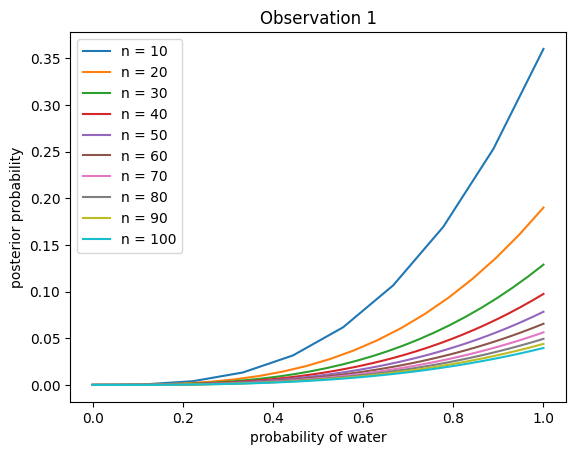

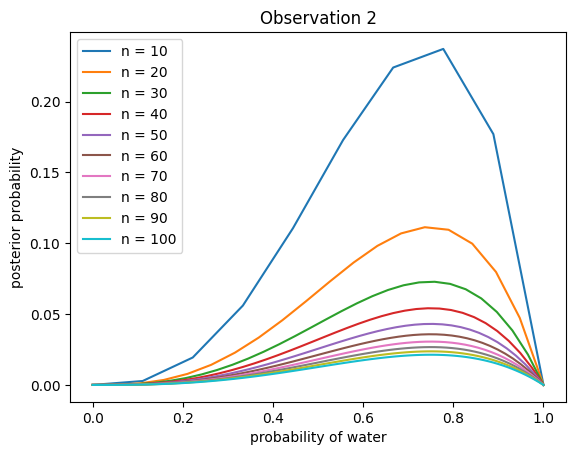

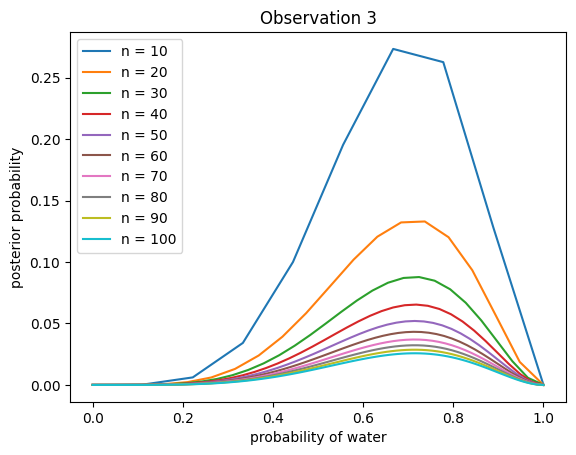

In [62]:
water = np.array([3,3,5])
total = np.array([3,4,7])

for w,t,trial in zip(water,total,range(3)):
    for grid in np.linspace(10, 100, 10):
        prior = 1
        likelihood = sp.stats.binom.pmf(w, t, np.linspace(0,1,int(grid))) 
        
        posterior = likelihood * prior
        posterior = posterior / np.sum(posterior)
        
        plt.plot(np.linspace(0,1,int(grid)), posterior, label = "n = {}".format(len(np.linspace(0,1,int(grid)))))
    plt.legend()
    plt.title("Observation " + str(trial + 1))
    plt.xlabel("probability of water")
    plt.ylabel("posterior probability")
    plt.show()

### 2M2.

Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when
p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

In [72]:
np.heaviside(np.array([0.1,0.3,0.6,1])-.5, 0.5)

array([0., 0., 1., 1.])

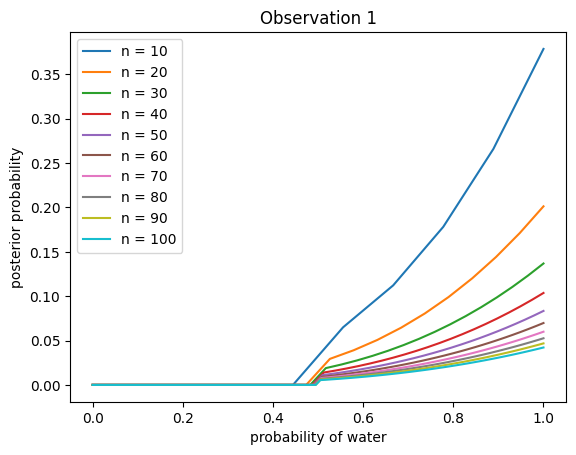

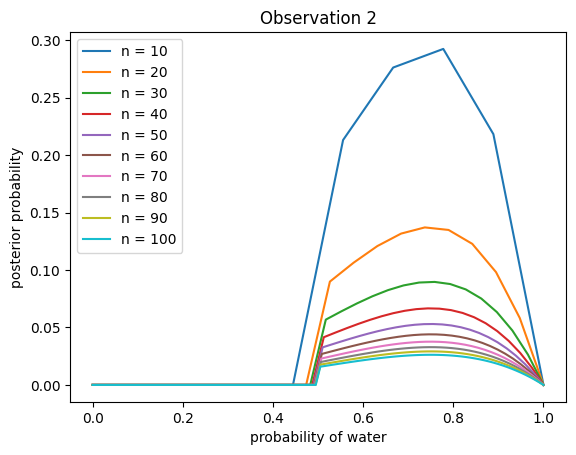

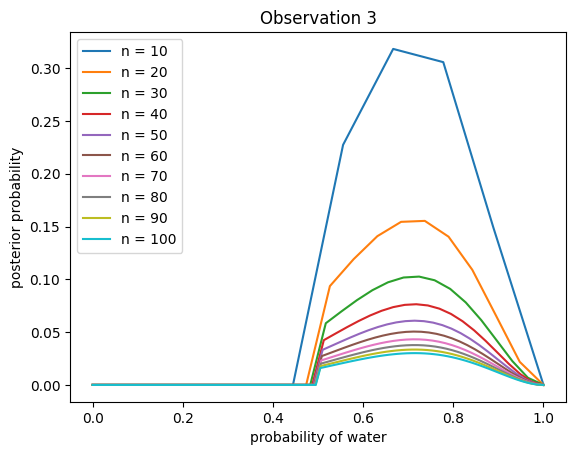

In [74]:
water = np.array([3,3,5])
total = np.array([3,4,7])

for w,t,trial in zip(water,total,range(3)):
    for grid in np.linspace(10, 100, 10):
        p = np.linspace(0,1,int(grid))
        
        prior= np.heaviside(p-0.5, 0.5)
        likelihood = sp.stats.binom.pmf(w, t, p) 
        
        posterior = likelihood * prior
        posterior = posterior / np.sum(posterior)
        
        plt.plot(np.linspace(0,1,int(grid)), posterior, label = "n = {}".format(len(p)))
    plt.legend()
    plt.title("Observation " + str(trial + 1))
    plt.xlabel("probability of water")
    plt.ylabel("posterior probability")
    plt.show()

### 2M3.

Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered
in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know
which—was tossed in the air and produced a “land” observation. Assume that each globe was equally
likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on
seeing “land” (Pr(Earth|land)), is 0.23.

#### Answer 
